#Importing libraries

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [128]:
!pip install lasio
import lasio

#Part 1

##importing dataset

In [129]:
df1=pd.read_csv('GPP_wiki.csv')

In [130]:
df1.head()

,Name,State,Location,Capacity(MW),Annual Generation(GWh),Owner,Type,Year,Ref
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,[4][5]
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009,[6][7][8]
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11,223 (2018),PacifiCorp,NaN,2007,[6][9]
3,Brady,Nevada,39°47′46″N 119°00′36″W﻿ / ﻿39.79611°N 119.01000°W,26,77 (2018),Ormat,NaN,1992,[6][10]
4,Coso,California,36°01′00″N 117°47′51″W﻿ / ﻿36.01667°N 117.79750°W,272.3,"1,176 (2018)",Coso Operating Company,Flash steam,1987,[11][12]


In [131]:
df1.shape

(31, 9)

Chnaging column names and dropping columns which are not required

In [132]:
cols_dict={'Capacity(MW)':'Capacity_MW','Annual Generation(GWh)':'AG_GWh'}
df1=df1.rename(columns=cols_dict)
df1=df1.drop(columns=['Ref'])
df1.replace(',','', regex=True, inplace=True)
df1.head()

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11,223 (2018),PacifiCorp,NaN,2007
3,Brady,Nevada,39°47′46″N 119°00′36″W﻿ / ﻿39.79611°N 119.01000°W,26,77 (2018),Ormat,NaN,1992
4,Coso,California,36°01′00″N 117°47′51″W﻿ / ﻿36.01667°N 117.79750°W,272.3,1176 (2018),Coso Operating Company,Flash steam,1987


In [133]:
df1.Capacity_MW.values

array(['19.2', '50', '11', '26', '272.3', '27', '92', '61', '39', '1590',
       '161.5', '432.3', '10', '4', '40', '138', '22', '64', '101.6',
       '70', '38', '11', '13.4', '11', '37', '73 [note 2]', '75', '13',
       '27', '18', '4 [note 3]'], dtype=object)

In [134]:
df1['Capacity_MW'] = df1['Capacity_MW'].str.extract(r'(\d+\.?\d*)')[0] #splitting at space
df1['Capacity_MW'] = pd.to_numeric(df1['Capacity_MW']) #chnging the type to numeric
df1.Capacity_MW.values


array([  19.2,   50. ,   11. ,   26. ,  272.3,   27. ,   92. ,   61. ,
         39. , 1590. ,  161.5,  432.3,   10. ,    4. ,   40. ,  138. ,
         22. ,   64. ,  101.6,   70. ,   38. ,   11. ,   13.4,   11. ,
         37. ,   73. ,   75. ,   13. ,   27. ,   18. ,    4. ])

In [135]:
df1.AG_GWh.head()

0      99 (2018)
1     229 (2018)
2     223 (2018)
3      77 (2018)
4    1176 (2018)
Name: AG_GWh, dtype: object

In [136]:
df1['AG_GWh'] = df1['AG_GWh'].str.extract(r'(\d+\.?\d*)')[0] #splitting at space
df1['AG_GWh'] = pd.to_numeric(df1['AG_GWh']) #chnging the type to numeric
df1.AG_GWh.values

array([  99,  229,  223,   77, 1176,  158,   91,  496,  327, 6516,  539,
       1741,   72,   13,  215,  771,  176,   56,  268,  138,  323,   83,
         98,   64,   61,  507,  159,   65,  213,  125,    9])

In [137]:
df1.head() #now just nos. in AG_GWh and Capacity_MW

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11.0,223,PacifiCorp,NaN,2007
3,Brady,Nevada,39°47′46″N 119°00′36″W﻿ / ﻿39.79611°N 119.01000°W,26.0,77,Ormat,NaN,1992
4,Coso,California,36°01′00″N 117°47′51″W﻿ / ﻿36.01667°N 117.79750°W,272.3,1176,Coso Operating Company,Flash steam,1987


In [138]:
df1['LocationDD'] = df1['Location'].str.split(' / ').str[1]

# Extract the latitude (north) and longitude (west) from the decimal degree coordinates
df1['LocDD_N'] = df1['LocationDD'].str.split('°N').str[0].str.extract(r'(\d+\.\d+)')[0]
df1['LocDD_W'] = df1['LocationDD'].str.split('°W').str[0].str.split('°N').str[1].str.extract(r'(\d+\.\d+)')[0]

# Convert extracted values to numeric type
df1['LocDD_N'] = pd.to_numeric(df1['LocDD_N'])
df1['LocDD_W'] = pd.to_numeric(df1['LocDD_W'])
df1['LocDD_W'] = df1['LocDD_W']*-1

In [139]:
df1.head()

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year,LocationDD,LocDD_N,LocDD_W
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,﻿40.55472°N 116.61750°W,40.55472,-116.61750
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009,﻿40.99500°N 118.14306°W,40.99500,-118.14306
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11.0,223,PacifiCorp,NaN,2007,﻿38.48917°N 112.85306°W,38.48917,-112.85306
3,Brady,Nevada,39°47′46″N 119°00′36″W﻿ / ﻿39.79611°N 119.01000°W,26.0,77,Ormat,NaN,1992,﻿39.79611°N 119.01000°W,39.79611,-119.01000
4,Coso,California,36°01′00″N 117°47′51″W﻿ / ﻿36.01667°N 117.79750°W,272.3,1176,Coso Operating Company,Flash steam,1987,﻿36.01667°N 117.79750°W,36.01667,-117.79750


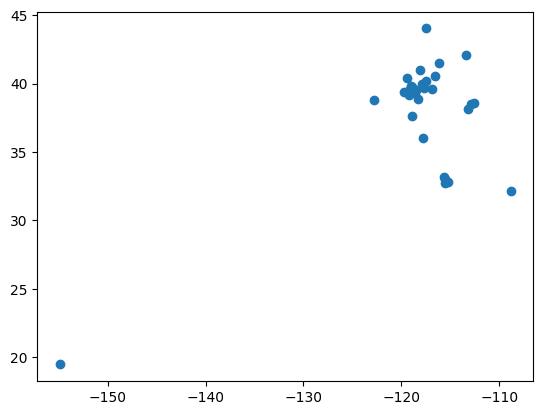

In [140]:
plt.scatter(df1['LocDD_W'],df1['LocDD_N'])

In [141]:
df1[['AG_GWh','Capacity_MW','State']].groupby(['State']).sum()

,AG_GWh,Capacity_MW
State,,
California,10511,2661.7
Hawaii,323,38.0
Idaho,83,11.0
Nevada,3536,763.6
New Mexico,13,4.0
Oregon,176,22.0
Utah,446,51.0


In [142]:
df1[['AG_GWh','Capacity_MW','State','Year']].groupby(['Year']).sum()

,AG_GWh,Capacity_MW,State
Year,,,
1960,6516,1590.0,California
1982,1741,432.3,California
1984,224,44.0,CaliforniaNevada
1985,729,272.7,NevadaNevadaCalifornia
1987,1505,410.9,CaliforniaCaliforniaNevada
1988,1003,134.0,NevadaNevada
1992,400,64.0,NevadaHawaii
2007,223,11.0,Utah
2008,83,11.0,Idaho


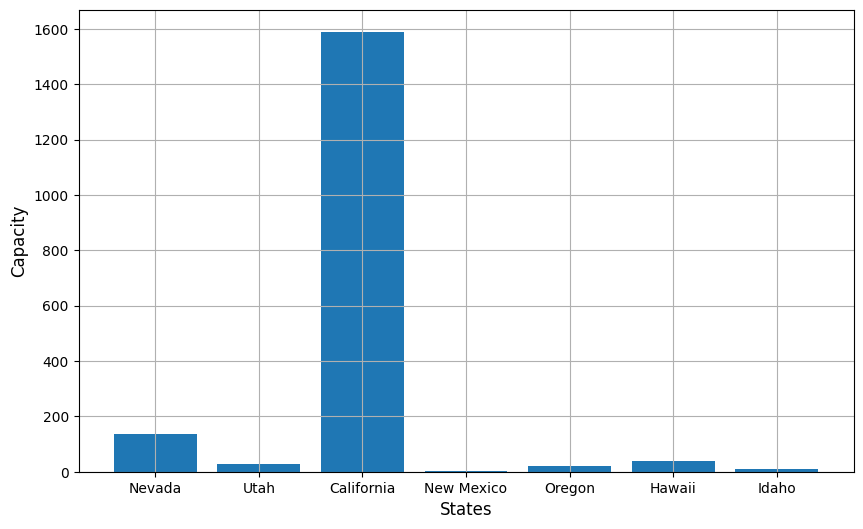

In [143]:
plt.figure(figsize=(10,6))
plt.bar(df1['State'],df1['Capacity_MW'])
plt.xlabel('States',size=12)
plt.ylabel('Capacity',size=12)
plt.grid(True)

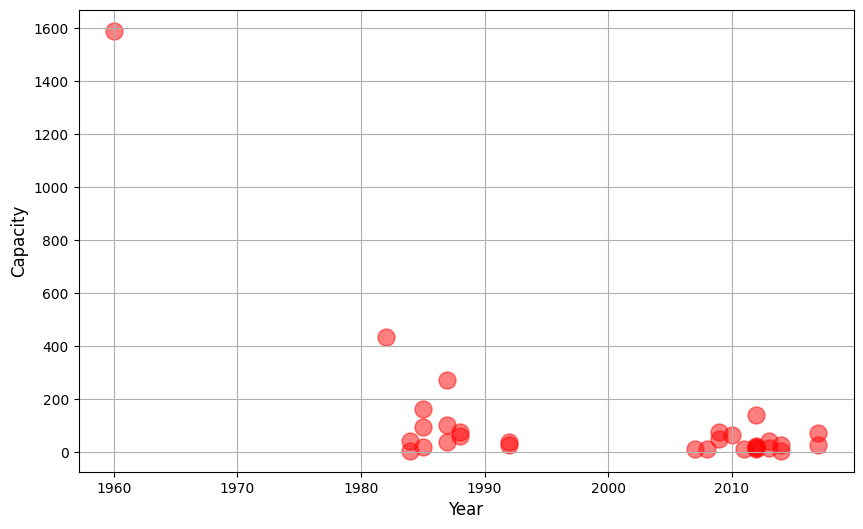

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Year'],df1['Capacity_MW'], s=150, color='red', alpha=0.5)
plt.xlabel('Year',size=12)
plt.ylabel('Capacity',size=12)
plt.grid(True)

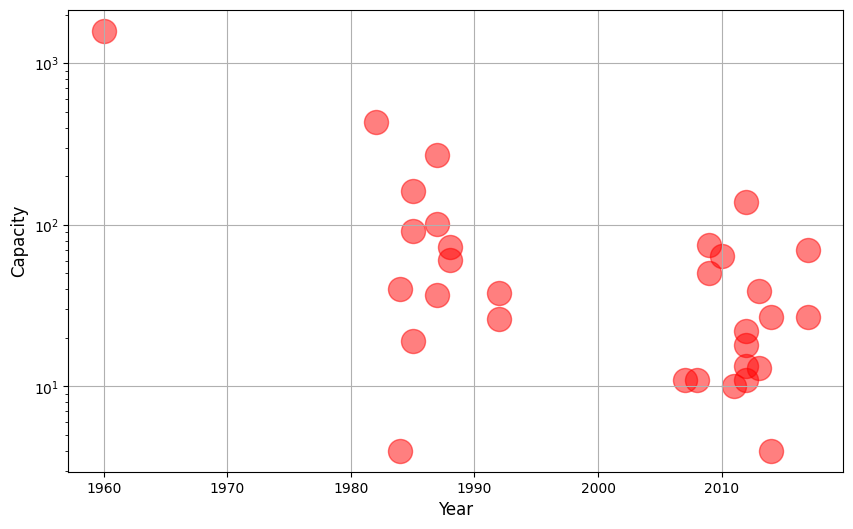

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Year'],df1['Capacity_MW'], s=300, color='red', alpha=0.5)
plt.xlabel('Year',size=12)
plt.ylabel('Capacity',size=12)
plt.grid(True)
plt.yscale('log')

#Part 2

##Well log input and output using lasio

In [146]:
las = lasio.read('4900722147_722147B.las')

In [147]:
dir(las)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_index_unit_contains',
 '_text',
 'append_curve',
 'append_curve_item',
 'curves',
 'curvesdict',
 'data',
 'delete_curve',
 'depth_ft',
 'depth_m',
 'df',
 'encoding',
 'get_curve',
 'header',
 'index',
 'index_initial',
 'index_unit',
 'insert_curve',
 'insert_curve_item',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'json',
 'keys',
 'match_raw_section',
 'other',
 'params',
 'read',
 'replace_curve_item',
 'sections',
 'set_data',
 'set_data_from_df',
 'stack_curves',
 'to_csv',
 'to_excel',
 'to_json',
 'update_curve',
 'update_start_stop_step',
 'update_units_from_index_curve

In [148]:
las.curves

[CurveItem(mnemonic="DEPT", unit="F", value="", descr="DEPTH (BOREHOLE) {F13.5}", original_mnemonic="DEPT", data.shape=(20587,)),
 CurveItem(mnemonic="AHO10", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A10 {F13.4}", original_mnemonic="AHO10", data.shape=(20587,)),
 CurveItem(mnemonic="AHO20", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A20 {F13.4}", original_mnemonic="AHO20", data.shape=(20587,)),
 CurveItem(mnemonic="AHO30", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A30 {F13.4}", original_mnemonic="AHO30", data.shape=(20587,)),
 CurveItem(mnemonic="AHO60", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A60 {F13.4}", original_mnemonic="AHO60", data.shape=(20587,)),
 CurveItem(mnemonic="AHO90", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A90 {F13.4}", original_mnemonic="AHO90", data.shape=(20587,)),
 CurveItem(mnemonic="BS", unit="IN", value="", descr="Bit Size {F13.4}", or

In [149]:
data=las.df()
data

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,...,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
DEPT,,,,,,,,,,,,,,,,,,,,,
264.57275,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,714.3266,94.4001,0.0157,-0.51861,...,0.1018,0.1102,0.46260,0.50474,9.98008,3.5057,0.09612,0.04418,-75.6761,903.50800
264.65608,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,706.3282,94.4001,0.0157,-0.51861,...,0.1018,0.1102,0.46260,0.50474,9.98008,3.5057,0.09612,0.04418,-75.5199,899.50816
264.73941,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,698.3297,94.4001,0.0157,-0.51861,...,0.1018,0.1102,0.46260,0.50474,9.98008,3.5057,0.09612,0.04418,-75.3636,895.50832
264.82274,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,690.3313,94.4001,0.0157,-0.51861,...,0.1018,0.1102,0.46260,0.50474,9.98008,3.5057,0.09612,0.04418,-75.2074,891.50848
264.90607,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,682.3329,94.4001,0.0157,-0.51861,...,0.1018,0.1102,0.46260,0.50474,9.98008,3.5057,0.09612,0.04418,-75.0511,887.50864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979.67081,31.1383,27.1648,20.2126,18.5625,19.8805,8.75,-46.5705,98.3530,-5.5381,607.21210,...,6.2940,5.8246,0.25379,0.25379,NaN,NaN,8.45543,8.33737,-233.1052,265.68324
1979.75414,31.1388,27.1657,20.2134,18.5638,19.8827,8.75,-46.5705,98.3530,-5.5381,607.21210,...,6.2963,5.8287,0.25379,0.25379,NaN,NaN,8.46382,8.36394,-233.1260,266.01656
1979.83747,31.1394,27.1664,20.2141,18.5650,19.8848,8.75,-46.5705,98.3530,-5.5381,607.21210,...,6.2987,5.8333,0.25379,0.25379,NaN,NaN,8.47304,8.43688,-233.1469,266.34988


In [150]:
data.shape

(20587, 27)

In [151]:
data.to_csv('well_data.csv')

In [152]:
data.describe()

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,...,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
count,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.00,20587.000000,20587.000000,20587.000000,20587.000000,...,20587.000000,20587.000000,20587.000000,20587.000000,20526.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000
mean,32.252442,34.950929,31.329049,27.927270,27.410640,8.75,676.743216,98.415896,0.604529,1.979741,...,32.480518,30.536038,0.354168,0.350520,2.633982,2.378150,75.528476,95.113983,-204.752749,1127.159692
std,128.857713,140.897812,103.180496,65.327454,62.005216,0.00,58.856309,2.063567,0.763592,33.070237,...,122.967020,110.639868,0.122171,0.109249,1.030962,0.243767,335.963370,427.417809,25.678274,169.538997
min,1.390700,1.575200,1.617800,1.696000,1.692500,8.75,-47.630800,94.400100,-5.538100,-1.199270,...,0.088000,0.098000,0.079420,0.101640,0.900000,1.207080,0.079030,0.044180,-258.340900,265.016600
25%,3.698500,4.027950,4.242050,4.588850,4.585250,8.75,657.181250,96.376600,0.322000,0.121195,...,8.775450,7.776900,0.274150,0.276935,2.176795,2.323168,10.977510,11.351180,-218.790850,993.186120
50%,17.888500,18.315800,18.586600,18.668400,18.827100,8.75,677.837400,98.353000,0.570400,0.156360,...,18.257100,18.035600,0.330620,0.328380,2.580130,2.392280,29.029920,29.143410,-201.691900,1135.970200
75%,29.044600,29.038150,29.255450,29.894550,29.507250,8.75,702.729100,100.329500,0.829150,0.198580,...,26.987650,26.212000,0.408290,0.406300,2.905518,2.450400,46.963240,48.894250,-186.484350,1265.619160
max,1950.000000,1950.000000,1699.496400,1294.100300,1097.065100,8.75,794.634900,100.329500,5.340600,607.212100,...,2065.122000,1849.720400,1.174630,1.200880,10.000000,4.628800,4896.128690,4960.920260,-74.894900,1634.082460


In [153]:
data.describe(percentiles=[0.1,0.5,0.9])

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,...,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
count,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.00,20587.000000,20587.000000,20587.000000,20587.000000,...,20587.000000,20587.000000,20587.000000,20587.000000,20526.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000
mean,32.252442,34.950929,31.329049,27.927270,27.410640,8.75,676.743216,98.415896,0.604529,1.979741,...,32.480518,30.536038,0.354168,0.350520,2.633982,2.378150,75.528476,95.113983,-204.752749,1127.159692
std,128.857713,140.897812,103.180496,65.327454,62.005216,0.00,58.856309,2.063567,0.763592,33.070237,...,122.967020,110.639868,0.122171,0.109249,1.030962,0.243767,335.963370,427.417809,25.678274,169.538997
min,1.390700,1.575200,1.617800,1.696000,1.692500,8.75,-47.630800,94.400100,-5.538100,-1.199270,...,0.088000,0.098000,0.079420,0.101640,0.900000,1.207080,0.079030,0.044180,-258.340900,265.016600
10%,3.184980,3.509000,3.688180,3.991140,3.986700,8.75,637.930820,96.376600,0.160920,0.076676,...,7.311280,6.476320,0.241558,0.247488,1.901610,2.248325,9.123478,9.566218,-239.552500,905.932832
50%,17.888500,18.315800,18.586600,18.668400,18.827100,8.75,677.837400,98.353000,0.570400,0.156360,...,18.257100,18.035600,0.330620,0.328380,2.580130,2.392280,29.029920,29.143410,-201.691900,1135.970200
90%,43.416000,45.704660,45.920180,47.533120,46.893140,8.75,723.437400,100.329500,1.174340,0.245968,...,37.413980,36.193220,0.458994,0.446972,3.113760,2.523935,82.309720,91.293292,-182.544800,1340.929328
max,1950.000000,1950.000000,1699.496400,1294.100300,1097.065100,8.75,794.634900,100.329500,5.340600,607.212100,...,2065.122000,1849.720400,1.174630,1.200880,10.000000,4.628800,4896.128690,4960.920260,-74.894900,1634.082460


In [154]:
data.describe().to_csv('well_data_stats.csv')

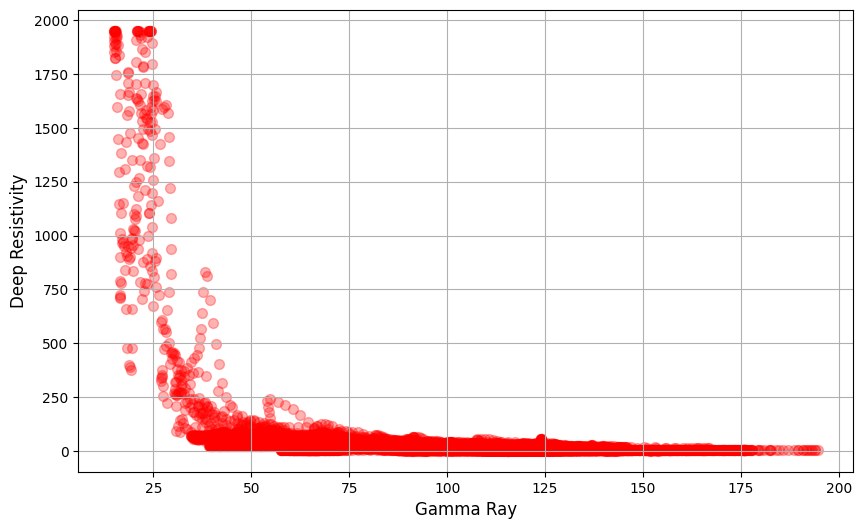

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(data['GR'],data['AHO20'], s=50, color='red', alpha=0.3)
plt.xlabel('Gamma Ray',size=12)
plt.ylabel('Deep Resistivity',size=12)
plt.grid(True)

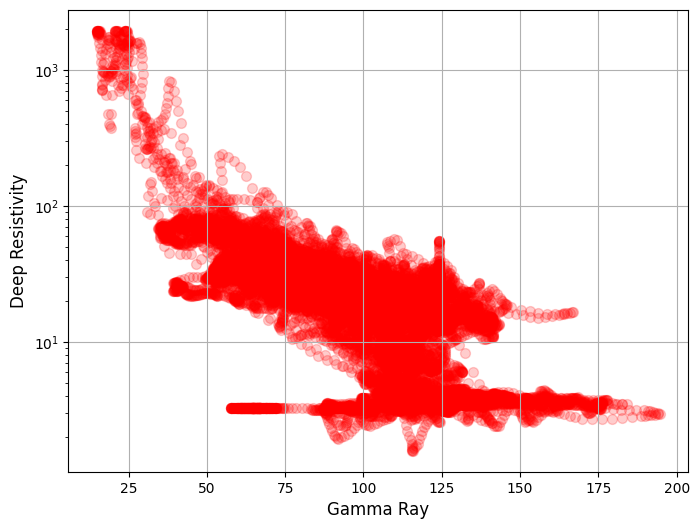

In [156]:
plt.figure(figsize=(8,6))
plt.scatter(data['GR'],data['AHO20'], s=50, color='red', alpha=0.2)
plt.xlabel('Gamma Ray',size=12)
plt.ylabel('Deep Resistivity',size=12)
plt.grid(True)
plt.yscale('log')

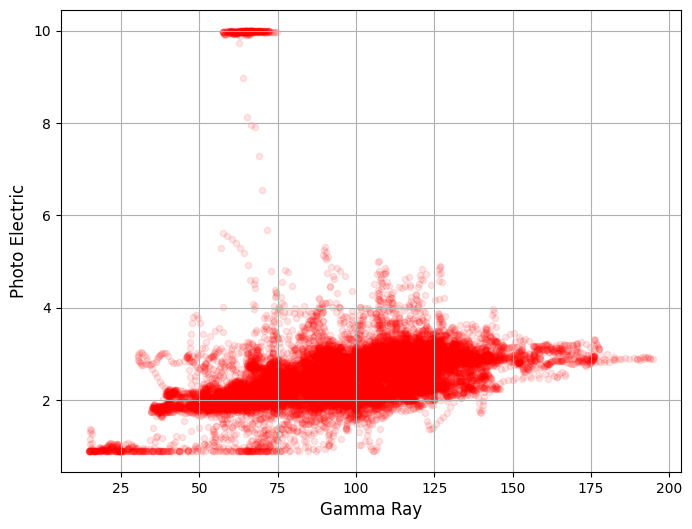

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(data['GR'],data['PEF8'], s=20, color='red', alpha=0.1)
plt.xlabel('Gamma Ray',size=12)
plt.ylabel('Photo Electric',size=12)
plt.grid(True)


(2000.0, 0.0)

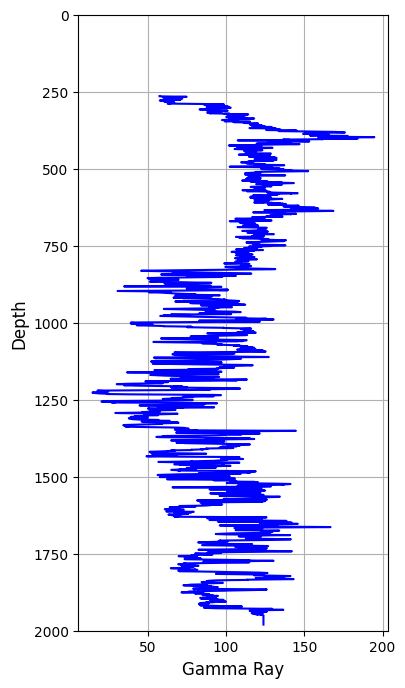

In [158]:
plt.figure(figsize=(4,8))
plt.plot(data['GR'],data.index,color='blue')
plt.xlabel('Gamma Ray',size=12)
plt.ylabel('Depth',size=12)
plt.grid(True)
plt.ylim(2000,0)


In [159]:
las.header['Well'].WELL.value # name of the well

'AR FEE 1791 15-23'

Text(0.5, 1.0, 'AHO10 and AHO20')

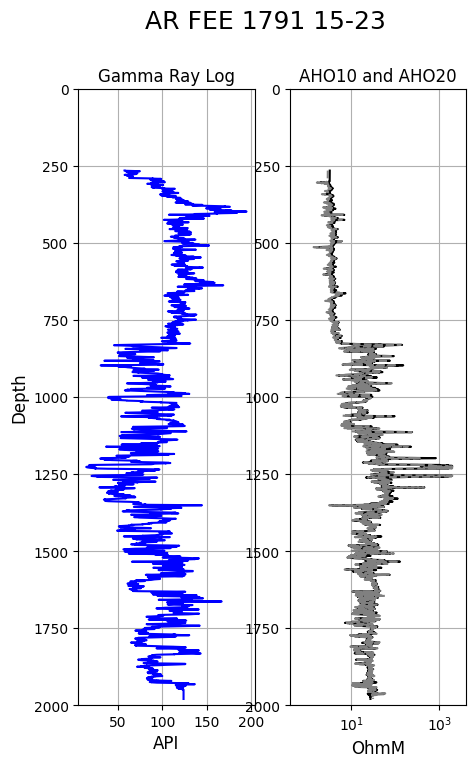

In [163]:
plt.figure(figsize=(5,8))
plt.suptitle(las.header['Well'].WELL.value, size=18)

plt.subplot(121)
plt.plot(data['GR'],data.index,color='blue')
plt.xlabel('API',size=12)
plt.ylabel('Depth',size=12)
plt.grid(True)
plt.ylim(2000,0)
plt.title('Gamma Ray Log')

plt.subplot(122)
plt.plot(data['AHO20'],data.index,color='black')
plt.plot(data['AHO10'],data.index,color='grey',linestyle='dashed')
plt.xlabel('OhmM',size=12)
plt.grid(True)
plt.ylim(2000,0)
plt.xlim(0.4,4000)
plt.xscale('log')
plt.title('AHO10 and AHO20')


In [161]:
lowGR= data.GR.quantile(.20)
highRES= data.AHO10.quantile(.95)
lowGR,highRES

(72.89142, 59.62491000000003)

In [162]:
payMapper = (data.GR.values <= lowGR) & (data.AHO10.values <= highRES)
np.unique(payMapper)

array([False,  True])

In [164]:
np.bincount(payMapper)

array([17465,  3122])

(2000.0, 0.0)

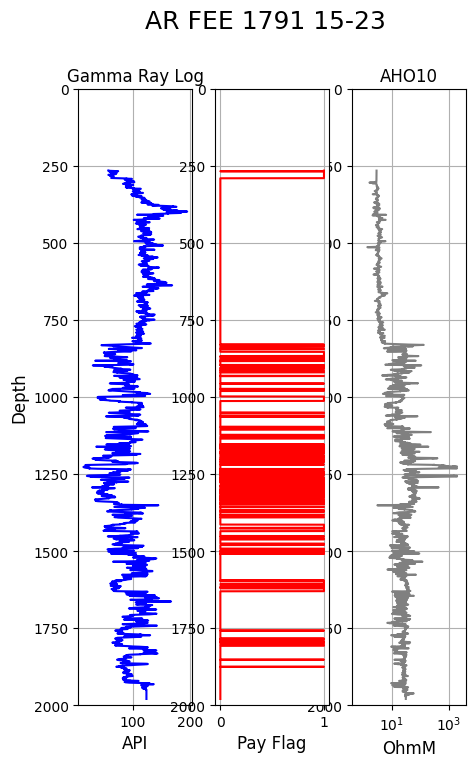

In [165]:
plt.figure(figsize=(5,8))
plt.suptitle(las.header['Well'].WELL.value, size=18)

plt.subplot(131)
plt.plot(data['GR'],data.index,color='blue')
plt.xlabel('API',size=12)
plt.ylabel('Depth',size=12)
plt.grid(True)
plt.ylim(2000,0)
plt.title('Gamma Ray Log')

plt.subplot(133)
plt.plot(data['AHO10'],data.index,color='grey')
plt.xlabel('OhmM',size=12)
plt.grid(True)
plt.ylim(2000,0)
plt.xlim(0.4,4000)
plt.xscale('log')
plt.title('AHO10')

plt.subplot(132)
plt.plot(payMapper,data.index,color='red')
plt.xlabel('Pay Flag',size=12)
plt.grid(True)
plt.ylim(2000,0)


#Part 3

Striplog : a package for basic graphic logs, stratigarphic information, formations and other eo stuffs.

In [166]:
!pip install striplog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.7 MB/s eta 0:00:00


In [169]:
import striplog

##Lexicon

In [171]:
from striplog import Lexicon
print(Lexicon.__doc__)


    A Lexicon is a dictionary of 'types' and regex patterns.

    Most commonly you will just load the default one.

    Args:
        params (dict): The dictionary to use. For an example, refer to the
            default lexicon in ``defaults.py``.
    


In [173]:
lex = Lexicon.default()
lex

{'lithology': ['overburden', 'sandstone', 'siltstone', 'shale', 'conglomerate', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders'], 'modifier': ['silty', 'sandy', 'shale?y', 'muddy', 'pebbly', 'gravell?y'], 'amount': ['streaks?', 'veins?', 'stringers?', 'interbed(?:s|ded)?', 'blotch(?:es)?', 'bands?', 'fragments?', 'impurit(?:y|ies)', 'abundant', 'minor', 'some', 'rare', 'flakes?', 'trace', '[-.\\d]+%', '[-.\\d]+pc', '[-.\\d]+per ?cent'], 'grainsize': ['vf(?:-)?', 'f(?:-)?', 'm(?:-)?', 'c(?:-)?', 'vc', 'very fine(?: to)?', 'fine(?: to)?', 'medium(?: to)?', 'coarse(?: to)?', 'very coarse', 'v fine(?: to)?', 'med(?: to)?', 'med.(?: to)?', 'v coarse', 'grains?', 'granules?', 'pebbles?', 'cobbles?', 'boulders?'], 'colour': ['red(?:dish)?', 'gray(?:ish)?', 'grey(?:ish)?', 'black(?:ish)?', 'whit(?:e|ish)', 'blu(?:e|ish)', 'purpl(?:e|ish)', 'yellow(?:ish)?', 'green(?:ish)?', 'brown(?:ish)?', 'light', 'd

In [174]:
lex.synonyms

{'Overburden': ['Drift'],
 'Anhydrite': ['Gypsum'],
 'Salt': ['Halite', 'Sylvite']}

In [175]:
s='grysh gn ss w/ sp gy sh'
lex.expand_abbreviations(s)

'greyish green sandstone with spotty gray shale'

##Compenent

In [176]:
from striplog import Component

In [177]:
print(Component.__doc__)


    Initialize with a dictionary of properties. You can use any
    properties you want e.g.:

        - lithology: a simple one-word rock type
        - colour, e.g. 'grey'
        - grainsize or range, e.g. 'vf-f'
        - modifier, e.g. 'rippled'
        - quantity, e.g. '35%', or 'stringers'
        - description, e.g. from cuttings
    


In [178]:
r={'colour' :'blue', 'grainsize': 'vf-f', 'quantity' : '20%'}
rock=Component(r)
rock

colour,blue
grainsize,vf-f
quantity,20%


In [179]:
rock.summary()

'Blue, vf-f, 20%'

##Position

In [180]:
from striplog import Position
print(Position.__doc__)


    Used to represent a position: a top or base.

    Not sure whether to go with upper-middle-lower or z_max, z_mid, z_min.
    Sticking to upper and lower, because ordering in Intervals is already
    based on 'above' and 'below'.
    


In [183]:
params = {'lower':160,
          'middle': 134,
          'upper':100,
          'meta':{'kind':'erosive', "source":'DOE'}}
p=Position(**params)
p

upper,100.0
middle,134.0
lower,160.0


In [184]:
p.z

134.0